# 3-D 10 particles using velocity rescale

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import math
from sympy import *

In [50]:
# functions 

def te_sys():
    te = 0
    for i in range(n):
        for j in range(n):
            if(i>= j):
                continue
            dist = (X[i] - X[j])*(X[i] - X[j]) + (Y[i] - Y[j])*(Y[i] - Y[j]) + (Z[i] - Z[j])*(Z[i] - Z[j])
            te = te + k*dist*0.5

    for i in range(n):
        vel = (VX[i])*(VX[i]) + (VY[i])*(VY[i]) + (VZ[i])*(VZ[i])
        te = te + m*vel*0.5
    return te

def ke_sys():
    te = 0
    for i in range(n):
        vel = (VX[i])*(VX[i]) + (VY[i])*(VY[i]) + (VZ[i])*(VZ[i])
        te = te + m*vel*0.5
    return te

def pe_sys():
    te = 0
    for i in range(n):
        for j in range(n):
            if(i>= j):
                continue
            dist = (X[i] - X[j])*(X[i] - X[j]) + (Y[i] - Y[j])*(Y[i] - Y[j]) + (Z[i] - Z[j])*(Z[i] - Z[j])
            te = te + k*dist*0.5
    return te




def vel_rescale():
    v_scale = np.sqrt(ke_T/ke_sys())
    ax = 0
    ay = 0
    az = 0
    for i in range(n):
        VX[i] = v_scale*VX[i]
        VY[i] = v_scale*VY[i]
        VZ[i] = v_scale*VZ[i]
        ax += VX[i]
        ay += VY[i]
        az += VZ[i]
    ax = ax/n
    ay = ay/n
    az = az/n
    for i in range(n):
        VX[i] = VX[i]-ax
        VY[i] = VY[i]-ay
        VZ[i] = VZ[i]-az
    



In [51]:
# initial conditions 
s = 10000
n = 10
m = 1
t = 0.01
k = 0.1
pie = np.pi
X = [5, 2, 1, 4, 8, 1, 4, 8, 2, 3]
Y = [8, 7, 2, 3, 7, 1, 0, 4, 9, 6]
Z = [0, 5, 4, 5, 0, 7, 9, 8, 0, 7]
VX = np.zeros(n)
VY = np.zeros(n)
VZ = np.zeros(n)

H = np.zeros(s-1)
KE = np.zeros(s-1)
PE = np.zeros(s-1)

x1 = np.linspace(0, 1, s-1)
PLTX = np.zeros(s-1)
PLTV = np.zeros(s-1)


# For constant temp T lets assume the KE is 40 arbritary units
ke_T = 40


# #Initial Energy Minimisation
# for j in range(1000):
#     for i in range(n):
#         c_x = X[i]
#         c_y = Y[i]
#         c_z = Z[i]
#         c_vx = VX[i]
#         c_vy = VY[i]
#         c_vz = VZ[i]
#         ax = 0
#         ay = 0
#         az = 0
#         for l in range(n):
#             ax = ax - k*(X[i]-X[l])
#             ay = ay - k*(Y[i]-Y[l])
#             az = az - k*(Z[i]-Z[l])
#         X[i] = c_x + t*c_vx + (t*t*ax)/2
#         Y[i] = c_y + t*c_vy + (t*t*ay)/2
#         Z[i] = c_z + t*c_vz + (t*t*az)/2
#         for l in range(n):
#             ax = ax - k*(X[i]-X[l])
#             ay = ay - k*(Y[i]-Y[l])
#             az = az - k*(Z[i]-Z[l])
#         VX[i] = c_vx + ((ax)*t)/2
#         VY[i] = c_vy + ((ay)*t)/2
#         VZ[i] = c_vz + ((az)*t)/2

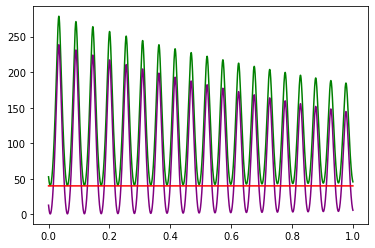

In [58]:
for j in range(s-1):
    H[j] = te_sys()
    KE[j] = ke_sys()
    PE[j] = pe_sys()
    PLTX[j] = X[6]
    PLTV[j] = VX[6]

    for i in range(n):
        c_x = X[i]
        c_y = Y[i]
        c_z = Z[i]
        c_vx = VX[i]
        c_vy = VY[i]
        c_vz = VZ[i]
        ax = 0
        ay = 0
        az = 0
        for l in range(n):
            ax = ax - k*(X[i]-X[l])
            ay = ay - k*(Y[i]-Y[l])
            az = az - k*(Z[i]-Z[l])
        X[i] = c_x + t*c_vx + (t*t*ax)/2
        Y[i] = c_y + t*c_vy + (t*t*ay)/2
        Z[i] = c_z + t*c_vz + (t*t*az)/2
        for l in range(n):
            ax = ax - k*(X[i]-X[l])
            ay = ay - k*(Y[i]-Y[l])
            az = az - k*(Z[i]-Z[l])
        VX[i] = c_vx + ((ax)*t)/2
        VY[i] = c_vy + ((ay)*t)/2
        VZ[i] = c_vz + ((az)*t)/2
    vel_rescale()


plt.plot(x1, H,color='green')
plt.plot(x1, PE,color='purple')
plt.plot(x1, KE, color='red')

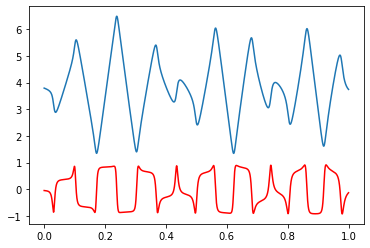

In [56]:
plt.plot(x1, PLTV,color='red')
plt.plot(x1, PLTX)

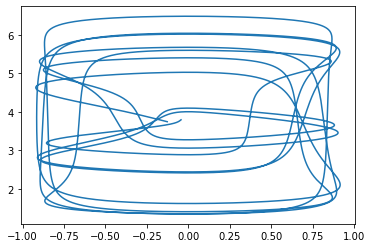

In [57]:
plt.plot(PLTV, PLTX)